# Basic Supervised Learning - Classification

This notebook practice basic classification algorithms and common evaluation techniques and metrics.
The notebook includes:

* [Iris dataset description](#dataset_description)
* [Train / Test](#train_test)
* [Decision tree](#decision_tree)
* [Confusion Matrix](#confusion_matrix)
* [Recall and precision](#recall_precision)
* [ROC and AUC](#roc_auc)
* [Cross validation](#cross_validation)
* [K-Nearest neighbors](#knn)

In [31]:
import sklearn # sklearn is the most common Python package for machine learning
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import tree
import pandas as pd
import numpy as np
import seaborn as sns

## <a name="dataset_description"></a>Iris Dataset Description:

The iris dataset describes iris flowers. 
The explaining features are:

* sepal length in cm
* sepal width in cm
* petal length in cm
* petal width in cm   

There are 3 different iris species: Setosa, Versicolor and Verginica

In [32]:
iris = pd.read_csv('../Data/iris.csv')

print(iris.shape)
print(iris.columns.values)

iris.head(10)

(150, 5)
['Sepal.Length' 'Sepal.Width' 'Petal.Length' 'Petal.Width' 'Species']


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


Let us run a simple plot on the dataset.

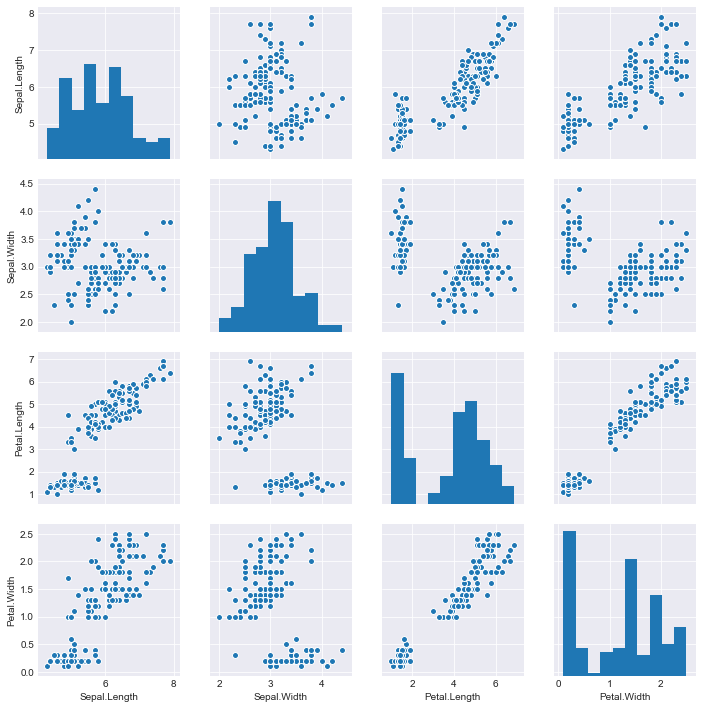

In [33]:
sns.pairplot(iris)

Let us add species information on the graph

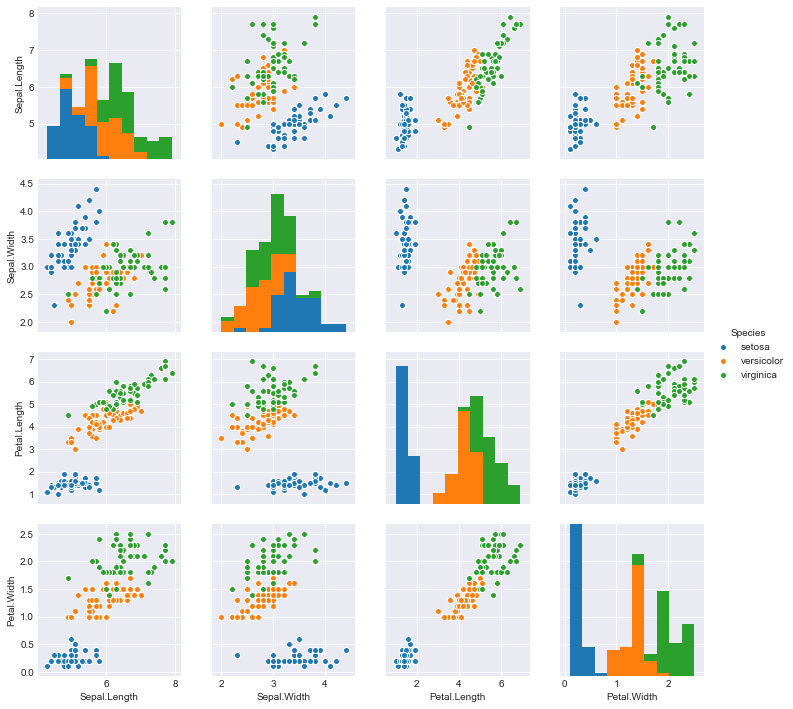

In [34]:
sns.pairplot(iris, hue="Species")

## <a name="train_test"></a>Train \ Test
As a first step we will seperate between the explaining variables from the target variable.

In [5]:
iris_explain = iris.drop(['Species'],axis = 1)
print(iris_explain.head())
iris_target = iris.Species
print(iris_target.head())

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: Species, dtype: object


Now, let's use sklearn train_test_split function.

In [35]:
X_train, X_test, y_train, y_test = train_test_split(iris_explain, iris_target, test_size=0.33, random_state=42)
print("train size: {}".format(X_train.shape))
print("test size: {}".format(X_test.shape))
print(y_train.head())
print(y_test.head(10))

train size: (100, 4)
test size: (50, 4)
96     versicolor
105     virginica
66     versicolor
0          setosa
122     virginica
Name: Species, dtype: object
73     versicolor
18         setosa
118     virginica
78     versicolor
76     versicolor
31         setosa
64     versicolor
141     virginica
68     versicolor
82     versicolor
Name: Species, dtype: object


## <a name="decision_tree"></a>Decision Tree

The convention in sklearn is first to define the learning algorithms (and its parameters), and only then fit it to a specific training set.

In [36]:
# define:
clf = tree.DecisionTreeClassifier(random_state=0) # using default parameters

# fit:
clf = clf.fit(X_train, y_train)

Unfortunately, printing a decision tree is not straight forward, but you can use the following code, and only slightly modify it per need.

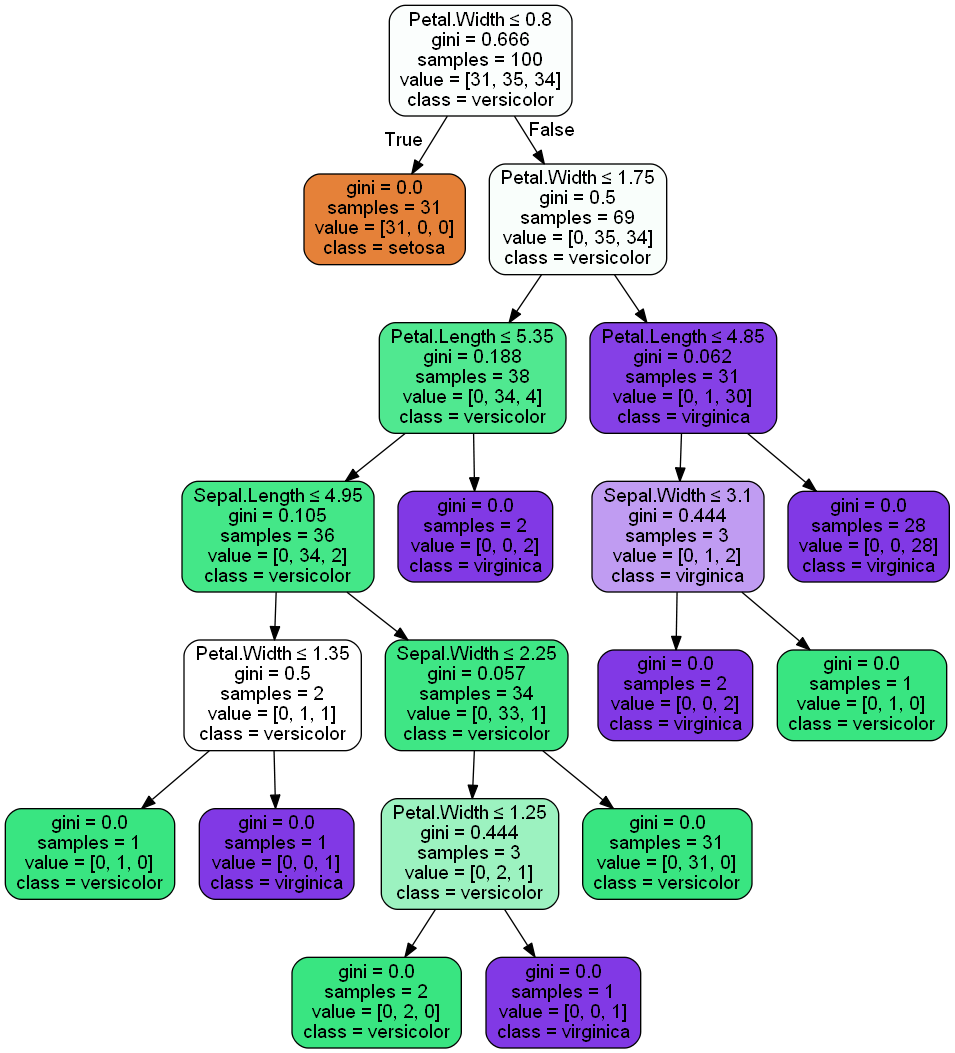

In [37]:
import os # This package provides tools for working with the operating system     
from sklearn.externals.six import StringIO # StringIO is a class that support input and output operations 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus


os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, feature_names = iris_explain.columns , 
                filled=True, rounded=True,class_names = iris_target.unique(),
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## <a name="confusion_matrix"></a>Confusion Matrix

Now let's use specific decision tree parameters.

In [39]:
# define:
clf = tree.DecisionTreeClassifier(random_state=0, criterion="entropy", min_samples_leaf=15, max_depth=2) # using default parameters

# fit:
clf = clf.fit(X_train, y_train)

Now, let us use the built model for predicting the Species on the test samples.

In [1]:
predicted = clf.predict(X_test)
predicted_prob = clf.predict_proba(X_test)
#print(predicted_prob[0:5,:])
#print(predicted[0:5])

c_matrix = confusion_matrix(y_test, predicted)
print(clf.classes_)
print(c_matrix)
dt_acc = c_matrix.trace()/c_matrix.sum()
print("Total accuracy: {}".format(dt_acc))

NameError: name 'clf' is not defined

Clearly, the task is not that challenging.  
Let's add some noise to the features

In [42]:
# Add noisy features to make the problem harder
noise = np.random.normal(0,1,iris_explain.shape)
print(noise)

iris_explain_with_noise = iris_explain + noise
iris_with_noise = pd.concat([iris_explain_with_noise, iris_target], axis=1)
iris_with_noise.head()

[[ 1.68018064e-01  4.72136021e-01 -6.54994845e-01 -8.36495247e-01]
 [ 8.12997672e-01  9.94841232e-01  9.27196624e-02  6.11077182e-01]
 [ 2.75073622e-01 -3.47540549e-01  5.94076712e-01  5.72787963e-01]
 [-2.73794286e-01  4.91479000e-01  4.37747315e-01 -5.59183116e-01]
 [-1.83861352e+00  4.95972349e-01  6.21518998e-01  7.77927979e-01]
 [-1.27087193e+00 -1.08613018e+00  1.91788820e-01  4.72135010e-01]
 [-1.91435927e+00  1.31248404e+00  8.26288691e-01 -2.69098575e-02]
 [-7.45704623e-01  6.73311926e-01  1.44925804e+00 -9.30986257e-01]
 [-5.95898952e-01  7.21108175e-01 -2.01561885e+00 -4.50502161e-01]
 [-8.65492814e-01  1.02007424e-01  8.93351061e-01 -5.18088654e-01]
 [ 6.43903119e-01 -1.91210438e+00  8.17292725e-01  6.88566298e-01]
 [ 5.41757923e-01 -1.12700892e+00 -2.68536992e-01  2.02449277e-02]
 [-5.02662754e-01 -3.30557181e-01  1.09166714e+00  1.08206564e+00]
 [ 1.96149781e-01 -5.27902542e-01  4.55419554e-01  8.40136932e-01]
 [ 1.11966451e+00  1.26141144e+00  2.87854608e-01  2.37803088e

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.268018,3.972136,0.745005,-0.636495,setosa
1,5.712998,3.994841,1.492720,0.811077,setosa
2,4.975074,2.852459,1.894077,0.772788,setosa
3,4.326206,3.591479,1.937747,-0.359183,setosa
4,3.161386,4.095972,2.021519,0.977928,setosa


Let's look again...

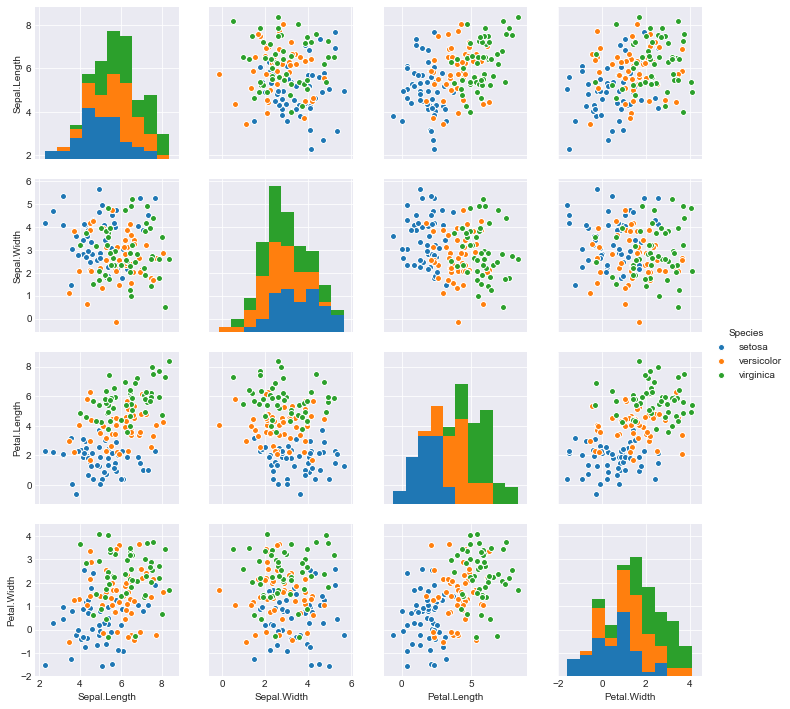

In [43]:
sns.pairplot(iris_with_noise, hue="Species")

It's better now. Let's start over again.

In [44]:
X_train, X_test, y_train, y_test = train_test_split(iris_explain_with_noise, iris_target, test_size=0.33, random_state=42)
print("train size: {}".format(X_train.shape))
print("test size: {}".format(X_test.shape))
print(X_train.head())
print(y_train.head())

train size: (100, 4)
test size: (50, 4)
     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
96       5.735126     2.060075      4.523764     3.453473
105      7.875705     2.597532      5.970831     2.732246
66       4.622821     4.242612      5.688831     0.618592
0        5.268018     3.972136      0.745005    -0.636495
122      6.456137     2.023369      4.668631     3.380151
96     versicolor
105     virginica
66     versicolor
0          setosa
122     virginica
Name: Species, dtype: object


In [45]:
# define:
clf = tree.DecisionTreeClassifier(random_state=0, criterion="entropy", min_samples_leaf=20, max_depth=3) # using default parameters

# fit:
clf = clf.fit(X_train, y_train)

In [46]:
predicted = clf.predict(X_test)
c_matrix = confusion_matrix(y_test, predicted)
print(c_matrix)
dt_acc = c_matrix.trace()/c_matrix.sum()
print("Total accuracy: {}".format(dt_acc))

[[18  1  0]
 [ 1 12  2]
 [ 0  7  9]]
Total accuracy: 0.78


## <a name="recall_precision"></a>Recall and Precision

Recall and precision are defined with respect to a specific target value.  
Let us compute it for each possible value.

In [47]:
target_values = iris_target.unique()

for i in range(0,target_values.size):
    print("Recall for target value {}:".format(target_values[i]))
    print(c_matrix[i,i]/c_matrix[i,:].sum())
    print("Precision for target value {}:".format(target_values[i]))
    print(c_matrix[i,i]/c_matrix[:,i].sum())


Recall for target value setosa:
0.9473684210526315
Precision for target value setosa:
0.9473684210526315
Recall for target value versicolor:
0.8
Precision for target value versicolor:
0.6
Recall for target value virginica:
0.5625
Precision for target value virginica:
0.8181818181818182


## <a name="roc_auc"></a>ROC Curves and AUC

Decision trees can provide not only crisp classification, but also a probabelistic one.  
Actually **ANY** supervised model raw output is probability.  
The classification is just a decision point on top of it. 

In [49]:
dt_prob_predict = clf.predict_proba(X_test)

predict_probs = pd.DataFrame(dt_prob_predict, columns=clf.classes_)
predict_probs.head(10)

,setosa,versicolor,virginica
0,0.000000,0.709677,0.290323
1,0.952381,0.047619,0.000000
2,0.000000,0.107143,0.892857
3,0.000000,0.709677,0.290323
4,0.000000,0.107143,0.892857
5,0.000000,0.709677,0.290323
6,0.000000,0.709677,0.290323
7,0.000000,0.107143,0.892857
8,0.000000,0.709677,0.290323
9,0.000000,0.709677,0.290323


Let us compute a ROC curve for the versicolor flowers:

In [50]:
versicolor_proba = predict_probs.loc[:,'versicolor']
print(y_test.head(10))
print(versicolor_proba[:30,])

73     versicolor
18         setosa
118     virginica
78     versicolor
76     versicolor
31         setosa
64     versicolor
141     virginica
68     versicolor
82     versicolor
Name: Species, dtype: object
0     0.709677
1     0.047619
2     0.107143
3     0.709677
4     0.107143
5     0.709677
6     0.709677
7     0.107143
8     0.709677
9     0.709677
10    0.709677
11    0.450000
12    0.047619
13    0.450000
14    0.047619
15    0.709677
16    0.709677
17    0.709677
18    0.450000
19    0.709677
20    0.450000
21    0.709677
22    0.450000
23    0.107143
24    0.107143
25    0.107143
26    0.709677
27    0.107143
28    0.047619
29    0.047619
Name: versicolor, dtype: float64


In [51]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thres = roc_curve(y_test=='versicolor', versicolor_proba)
roc_auc = auc(fpr, tpr)
print("The AUC for versicolor flowers is: {}".format(roc_auc))
print(fpr)
print(tpr)
print(thres)

The AUC for versicolor flowers is: 0.8123809523809524
[0.         0.22857143 0.42857143 0.68571429 1.        ]
[0.         0.8        0.86666667 1.         1.        ]
[1.70967742 0.70967742 0.45       0.10714286 0.04761905]


Let us plot the ROC curve:

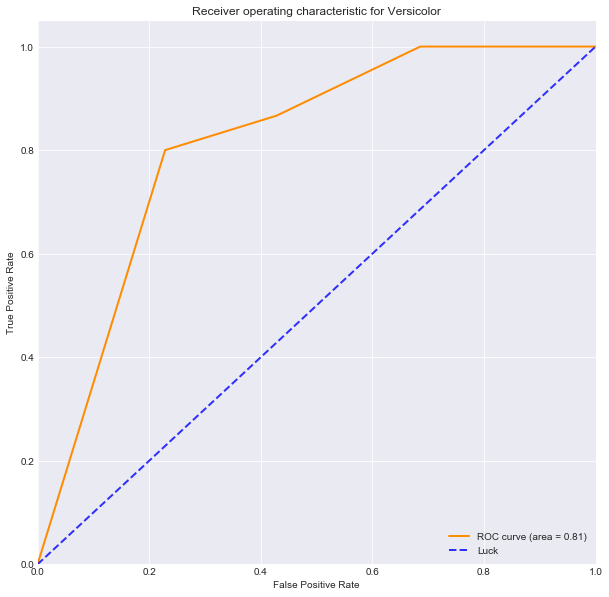

In [52]:
import matplotlib.pyplot as plt

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='b',
         label='Luck', alpha=.8)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Versicolor')
plt.legend(loc="lower right")
plt.rcParams["figure.figsize"]=(10,10)
plt.show()

## <a name="cross_validation"></a>Cross Validation

In [53]:

from sklearn.model_selection import KFold
kf = KFold(n_splits=10)

for train_index, test_index in kf.split(iris_explain_with_noise,iris_target):
    print("Test indices:", test_index)

Test indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Test indices: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Test indices: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]
Test indices: [45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]
Test indices: [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74]
Test indices: [75 76 77 78 79 80 81 82 83 84 85 86 87 88 89]
Test indices: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104]
Test indices: [105 106 107 108 109 110 111 112 113 114 115 116 117 118 119]
Test indices: [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134]
Test indices: [135 136 137 138 139 140 141 142 143 144 145 146 147 148 149]


Do you see any problem there?

In [54]:
kf = KFold(n_splits=10,shuffle=True) # this time adding shuffle option
for train_index, test_index in kf.split(iris_explain_with_noise,iris_target):
    print("Test indices:", test_index)

Test indices: [  5  43  47  56  75  78  93  94 115 118 122 129 140 141 147]
Test indices: [  4  36  42  46  74  82  92  96 102 105 106 107 113 123 128]
Test indices: [ 24  32  40  52  59  66  67  69  80  91 117 119 135 137 139]
Test indices: [  0   6   7  10  20  21  22  45  49  61  76  95 114 120 133]
Test indices: [ 12  26  35  86  87  99 100 103 111 112 125 127 130 132 136]
Test indices: [  3  19  38  41  48  53  58  72  73 109 110 121 142 144 149]
Test indices: [ 16  25  29  34  50  51  62  63  64  70  90 124 126 143 148]
Test indices: [  8   9  14  17  18  27  30  65  77  85  89  97 104 131 138]
Test indices: [  1  11  13  15  28  31  37  55  71  81  83 101 108 134 146]
Test indices: [  2  23  33  39  44  54  57  60  68  79  84  88  98 116 145]


K-Fold cv is more than a single estimator. It allows us to assess the stability of the system.

In [55]:
clf = tree.DecisionTreeClassifier(random_state=0, criterion="entropy", min_samples_leaf=20, max_depth=3) # using default parameters

for train_index, test_index in kf.split(iris_explain_with_noise,iris_target):
    X_train, X_test = iris_explain_with_noise.loc[train_index,:], iris_explain_with_noise.loc[test_index,:]
    y_train, y_test = iris_target.loc[train_index], iris_target.loc[test_index]
    clf = clf.fit(X_train, y_train)
    predicted = clf.predict(X_test)
    c_matrix = confusion_matrix(y_test, predicted)
    dt_acc = c_matrix.trace()/c_matrix.sum()
    print(dt_acc)
    #print(np.mean(dt_acc))

0.8
0.7333333333333333
0.7333333333333333
0.8666666666666667
0.6666666666666666
0.8
0.8
0.7333333333333333
0.6666666666666666
0.7333333333333333


Another way to perform CV:

In [24]:
clf = tree.DecisionTreeClassifier(random_state=0, criterion="entropy", min_samples_leaf=1, max_depth=20) # using default parameters

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
scores = cross_val_score(clf, iris_explain_with_noise, iris_target, cv=cv, scoring='accuracy')
print(scores)

[0.71111111 0.62222222 0.62222222 0.68888889 0.66666667 0.71111111
 0.62222222 0.66666667 0.73333333 0.73333333]


ROC with cross-validation

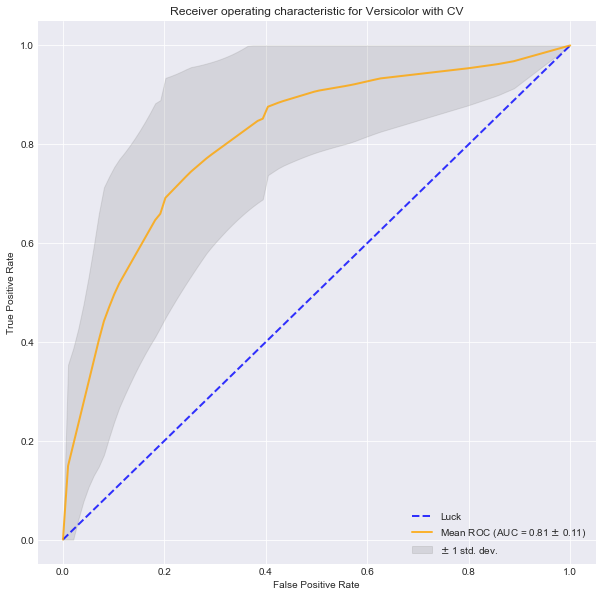

In [56]:
from scipy import interp

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0
for train_index, test_index in kf.split(iris_explain_with_noise,iris_target):
    
    X_train, X_test = iris_explain_with_noise.loc[train_index,:], iris_explain_with_noise.loc[test_index,:]
    y_train, y_test = iris_target.loc[train_index], iris_target.loc[test_index]
    
    clf = clf.fit(X_train, y_train)
    probas = clf.predict_proba(X_test)
    
        # Compute ROC curve and area the curve
    fpr, tpr, _ = roc_curve(y_test=='versicolor', probas[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    #plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1

# mean performance
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)

# std performance
std_auc = np.std(aucs)
std_tpr = np.std(tprs, axis=0)

# upper and lower
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)


# plot
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='b',
         label='Luck', alpha=.8)

plt.plot(mean_fpr, mean_tpr, color='orange',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Versicolor with CV')
plt.legend(loc="lower right")

plt.rcParams["figure.figsize"]=(10,10)
plt.show()

## <a name="knn"></a>K-Nearest Neighbors

In [57]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=1)
X_train, X_test, y_train, y_test = train_test_split(iris_explain_with_noise, iris_target, test_size=0.33, random_state=42)
neigh.fit(X_train,np.ravel(y_train))

predicted = neigh.predict(X_test)
c_matrix = confusion_matrix(y_test, predicted)
dt_acc = c_matrix.trace()/c_matrix.sum()
print(c_matrix)
print(dt_acc)

[[14  4  1]
 [ 1 11  3]
 [ 0  6 10]]
0.7


Let's try to build a grid search for k

In [58]:
def knn_k(k):
    neigh = KNeighborsClassifier(n_neighbors=k)
    X_train, X_test, y_train, y_test = train_test_split(iris_explain_with_noise, iris_target, test_size=0.33, random_state=42)
    neigh.fit(X_train,np.ravel(y_train))
    predicted = neigh.predict(X_test)
    c_matrix = confusion_matrix(y_test, predicted)
    dt_acc = c_matrix.trace()/c_matrix.sum()
    return dt_acc

def search_k(min_val, max_val):    
    accs = list()
    for index in range((max_val-min_val)):
        k = min_val + index
        current_acc = knn_k(k)
        accs.append(current_acc)
    return accs

# testing
search_k(1,10)

[0.7, 0.74, 0.78, 0.8, 0.82, 0.8, 0.78, 0.8, 0.8]

Now let's search

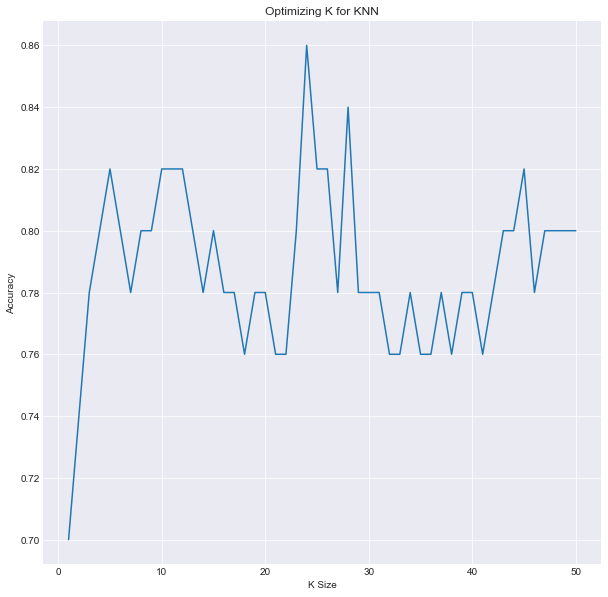

In [59]:
min_k=1
max_k=50
accs = search_k(min_k,max_k+1)
sns.set_style("darkgrid")
plt.plot(range(min_k,max_k+1), accs)
plt.xlabel('K Size')
plt.ylabel('Accuracy')
plt.title('Optimizing K for KNN')
plt.show()

Scale is highly important in k-nn.  
Let's change a scale of a specific variable without changing anything else.

In [60]:
unscaled_iris = iris_explain_with_noise.copy(deep=True)
unscaled_iris.loc[:,'Sepal.Length'] = 1000*unscaled_iris.loc[:,'Sepal.Length'] # changing cm to mm
print(unscaled_iris.head())

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
0   5268.018064     3.972136      0.745005    -0.636495
1   5712.997672     3.994841      1.492720     0.811077
2   4975.073622     2.852459      1.894077     0.772788
3   4326.205714     3.591479      1.937747    -0.359183
4   3161.386477     4.095972      2.021519     0.977928


In [61]:
neigh_unscaled = KNeighborsClassifier(n_neighbors=1)
X_train, X_test, y_train, y_test = train_test_split(unscaled_iris, iris_target, test_size=0.33, random_state=42)
neigh_unscaled.fit(X_train,np.ravel(y_train))
predicted = neigh.predict(X_test)
c_matrix = confusion_matrix(y_test, predicted)
dt_acc = c_matrix.trace()/c_matrix.sum()
print(c_matrix)
print(dt_acc)

[[ 0 19  0]
 [ 0 15  0]
 [ 0 16  0]]
0.3


Performance changed due to different scale of one variable.